<a href="https://colab.research.google.com/github/leifblake/cgt370_finalprojpython/blob/main/Blake_Leif_CGT370_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Python for Data Preparation
_____________________

Before building any visualizations, I want to focus on cleaning, merging, and transforming the raw datasets in Python using this Google Colab notebook. This step is essential for making my data analysis both accurate and insightful.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load both datasets
income_path = '/content/drive/MyDrive/370_finalproj_datasets/incomedata.csv'
coli_path = '/content/drive/MyDrive/370_finalproj_datasets/costofliving.csv'

income_df = pd.read_csv(income_path, dtype=str)  # Load as string to clean later
coli_df = pd.read_csv(coli_path)  # Make sure this is loaded too

# Quick look
income_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,Unnamed: 130
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,NaN
1,1600000US0100100,"Abanda CDP, Alabama",67,48,0.0,38.9,0.0,38.9,37.3,43.5,...,**,N,N,(X),(X),(X),(X),0.0,(X),NaN
2,1600000US0100124,"Abbeville city, Alabama",922,140,7.3,4.4,10.1,4.9,23.1,8.5,...,4108,33052,10875,(X),(X),(X),(X),38.8,(X),NaN
3,1600000US0100460,"Adamsville city, Alabama",1490,166,8.1,5.1,8.3,4.9,16.2,7.4,...,3919,27962,5262,(X),(X),(X),(X),64.1,(X),NaN
4,1600000US0100484,"Addison town, Alabama",296,62,6.1,6.6,7.4,8.7,13.5,6.9,...,14099,39878,22232,(X),(X),(X),(X),21.9,(X),NaN


In [ ]:
# Select relevant columns from income dataset
columns_to_keep = [
    'NAME',
    'S1901_C01_001E',  # Total households
    'S1901_C01_012E',  # Median household income
    'S1901_C01_002E', 'S1901_C01_003E', 'S1901_C01_004E',
    'S1901_C01_005E', 'S1901_C01_006E', 'S1901_C01_007E',
    'S1901_C01_008E', 'S1901_C01_009E', 'S1901_C01_010E',
    'S1901_C01_011E'
]

income_clean = income_df[columns_to_keep].copy()

# Rename columns for clarity
income_clean.columns = [
    'Geography',
    'Total_Households',
    'Median_Household_Income',
    'Less_than_10k', '10k_14k', '15k_24k', '25k_34k', '35k_49k',
    '50k_74k', '75k_99k', '100k_149k', '150k_199k', '200k_plus'
]

# Clean numeric fields
for col in income_clean.columns[1:]:
    income_clean[col] = income_clean[col].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
    income_clean[col] = pd.to_numeric(income_clean[col], errors='coerce')

# Drop rows with missing required values
income_clean = income_clean.dropna(subset=['Total_Households', 'Median_Household_Income'])

# Create a Geography column in cost of living dataset
coli_df['Geography'] = coli_df['City'].str.strip() + ', ' + coli_df['State'].str.strip()

# Ensure cost of living is numeric
if coli_df['Cost of Living Index'].dtype == 'object':
    coli_df['Cost of Living Index'] = coli_df['Cost of Living Index'].str.replace(',', '')
    coli_df['Cost of Living Index'] = coli_df['Cost of Living Index'].astype(float)

# Check sample values
print(income_clean.head())
print(coli_df.head())


                  Geography  Total_Households  Median_Household_Income  \
1       Abanda CDP, Alabama              67.0                  25787.0   
2   Abbeville city, Alabama             922.0                  36944.0   
3  Adamsville city, Alabama            1490.0                  46150.0   
4     Addison town, Alabama             296.0                  44000.0   
5       Akron town, Alabama              92.0                  28438.0   

   Less_than_10k  10k_14k  15k_24k  25k_34k  35k_49k  50k_74k  75k_99k  \
1            0.0      0.0     37.3     40.3      0.0     22.4      0.0   
2            7.3     10.1     23.1      7.3     14.1     12.8     13.9   
3            8.1      8.3     16.2     10.6      9.5     17.2     12.1   
4            6.1      7.4     13.5     13.2     18.9     18.2      9.1   
5            8.7      6.5     22.8     17.4     15.2     27.2      0.0   

   100k_149k  150k_199k  200k_plus  
1        0.0        0.0        0.0  
2        6.9        3.3        1.3  

In [ ]:
# Create a Geography column in cost of living dataset
coli_df['Geography'] = coli_df['City'].str.strip() + ', ' + coli_df['State'].str.strip()

# Ensure cost of living is numeric
if coli_df['Cost of Living Index'].dtype == 'object':
    coli_df['Cost of Living Index'] = coli_df['Cost of Living Index'].str.replace(',', '')
    coli_df['Cost of Living Index'] = coli_df['Cost of Living Index'].astype(float)

# Merge the datasets on 'Geography'
merged_df = pd.merge(income_clean, coli_df[['Geography', 'Cost of Living Index']], on='Geography', how='inner')

# Create the Value Index: Median Household Income / Cost of Living Index
merged_df['Value_Index'] = merged_df['Median_Household_Income'] / merged_df['Cost of Living Index']

# Top 10 "best bang for your buck"
top_value = merged_df.sort_values('Value_Index', ascending=False).head(10)
bottom_value = merged_df.sort_values('Value_Index', ascending=True).head(10)

# Display results
print("Top 10 Most Valuable Places:")
print(top_value[['Geography', 'Value_Index', 'Median_Household_Income', 'Cost of Living Index']])

print("\nBottom 10 Least Valuable Places:")
print(bottom_value[['Geography', 'Value_Index', 'Median_Household_Income', 'Cost of Living Index']])


Top 10 Most Valuable Places:
Empty DataFrame
Columns: [Geography, Value_Index, Median_Household_Income, Cost of Living Index]
Index: []

Bottom 10 Least Valuable Places:
Empty DataFrame
Columns: [Geography, Value_Index, Median_Household_Income, Cost of Living Index]
Index: []


In [ ]:
# Function to clean income dataset place names
def clean_income_geography(name):
    parts = name.split(', ')
    if len(parts) != 2:
        return None
    place_part, state_full = parts
    # Remove suffix like ' city', ' town', ' CDP'
    city = place_part.replace(' city', '').replace(' town', '').replace(' CDP', '').strip()
    return f"{city}, {us_state_abbrev.get(state_full, state_full)}"  # Use state abbreviation

# Dictionary to convert state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Clean up geography columns in both datasets
income_clean['Geography_Clean'] = income_clean['Geography'].apply(clean_income_geography)
coli_df['Geography_Clean'] = coli_df['Geography'].str.strip()

# Merge using the cleaned geography columns
merged_df = pd.merge(
    income_clean,
    coli_df[['Geography_Clean', 'Cost of Living Index']],
    on='Geography_Clean',
    how='inner'
)

# Create the Value Index
merged_df['Value_Index'] = merged_df['Median_Household_Income'] / merged_df['Cost of Living Index']
print("Merged rows:", merged_df.shape[0])


Merged rows: 492


In [ ]:
# Brackets
low = ['Less_than_10k', '10k_14k', '15k_24k']
high = ['100k_149k', '150k_199k', '200k_plus']

# Convert to percent of total households
for col in low + high:
    merged_df[f'pct_{col}'] = merged_df[col] / merged_df['Total_Households']

# Inequality score: ratio of low-income to high-income households
merged_df['inequality_score'] = merged_df[[f'pct_{col}' for col in low]].sum(axis=1) / \
                                 merged_df[[f'pct_{col}' for col in high]].sum(axis=1)



##Data Preparation
_____________________
###Key Steps and Why They Mattered:
- **Loading & Cleaning the Data**: I imported two seperate datasets- one with **household income data from the U.S. Census** and another with **cost of living data by city.** The income dataset needed extra cleaning, including renaming columns, removing currency symbols, and converting values to numeric format. This helped ensure the datasets were usable for statistical comparisons.
- **Creating a Common Geography Field**: Each dataset labeled cities differently, so I wrote a function to clean and standardize geographic names. This allowed me to **merge the two datasets** on a unified column (Geography_Clean)- a critical step that connected income data with cost-of-living data.
- **Constructing New Metrics**: I calculated a Value Index for each city by dividing the median houshold income by its cost of living index. This created a new, actionable variable to **measure economic efficiency**- answering the core project question about where people get the most value from their income.
- **Basic Grouping for Comparison**: I sorted cities into Top 10 and Bottom 10 groups by Value Index and also built an Income Inequality Score by comparing loq-income and high-income household percentages. These early computations formed the analytical backbone for later visualizations.
_____________________
###How This Supports the Project's Goals:
By processing the data this way, I laid the groundwork for producing **clear, insightful visualizations** that connect real-world affordability with income patterns. The merged and cleaned dataset allowed me to:
- Make accurate city-to-city comparisons
- Build new metrics tailored to my project's questions
- Ensure that visualizations reflect meaningful and validated information

In short, this data work tuned messy spreadsheets into a structured dataset that could reveal **where Americans thrive financially- and where they struggle**.


#Python Visualizations
_____________________

##1) Income Inequality Score by City


Top 10 Most Unequal Cities (High ratio of low-income to high-income households):
                    Display_Name  inequality_score
89              Palatka, Florida          7.150000
358      Johnstown, Pennsylvania          6.328358
331             Youngstown, Ohio          6.220588
211            Saginaw, Michigan          5.848485
198              Flint, Michigan          5.102564
289  Forest City, North Carolina          4.939024
312              Ashtabula, Ohio          4.329412
124         Carbondale, Illinois          4.260504
111          Statesboro, Georgia          4.072917
376    Greenwood, South Carolina          4.055556

Top 10 Most Equal Cities (Low ratio of low-income to high-income households):
                  Display_Name  inequality_score
50        San Jose, California          0.158516
184       California, Maryland          0.186567
56         Truckee, California          0.202358
86             Naples, Florida          0.206597
43            Napa, California   

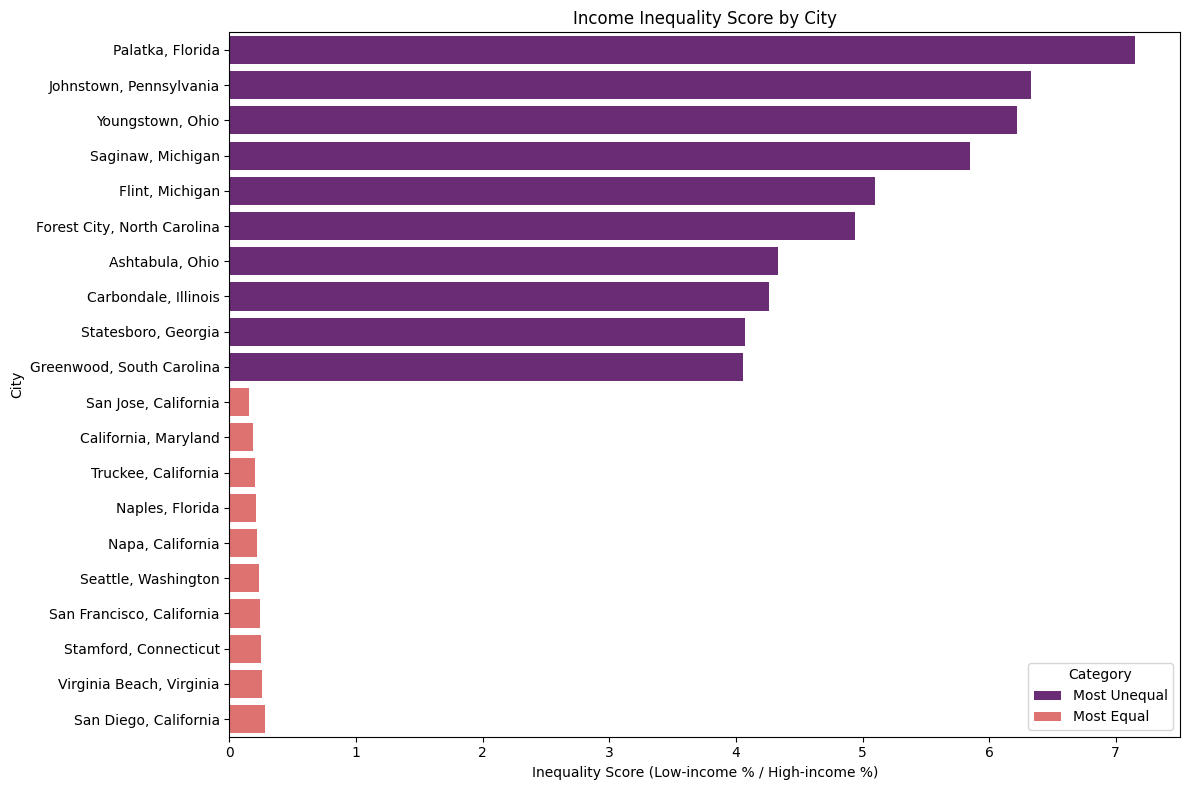

In [ ]:
most_unequal = merged_df.sort_values('inequality_score', ascending=False).head(10)
least_unequal = merged_df.sort_values('inequality_score').head(10)


# Clean display names for the inequality data
most_unequal['Display_Name'] = most_unequal['Geography'].str.replace(r' (city|town|CDP),', ',', regex=True)
least_unequal['Display_Name'] = least_unequal['Geography'].str.replace(r' (city|town|CDP),', ',', regex=True)

# Print out the top and bottom cities by inequality
print("\nTop 10 Most Unequal Cities (High ratio of low-income to high-income households):")
print(most_unequal[['Display_Name', 'inequality_score']])

print("\nTop 10 Most Equal Cities (Low ratio of low-income to high-income households):")
print(least_unequal[['Display_Name', 'inequality_score']])

# Combine for plot
most_unequal['Category'] = 'Most Unequal'
least_unequal['Category'] = 'Most Equal'
ineq_plot_df = pd.concat([most_unequal, least_unequal])

# Visualize inequality
plt.figure(figsize=(12, 8))
sns.barplot(
    data=ineq_plot_df,
    y='Display_Name',
    x='inequality_score',
    hue='Category',
    dodge=False,
    palette='magma'
)
plt.title('Income Inequality Score by City')
plt.xlabel('Inequality Score (Low-income % / High-income %)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


#Interpreting Income Inequality Bar Graph:
_____________________
##Understanding the Inequality Score
I calculated the inequality score as:
- inequality_score = (% of households earning ≤ 25,000) / (% earning ≥ 100,000)

This score tells us **how many low-income households exist relative to high-income households** in a city. A high score means many more low-income households than high-income ones, and a low score means the opposite (more balance or even more high-income than low-income). Scores range from 0.16 to 7.15
_____________________
##Top 10 Most Unequal Cities (High Inequality Score)
These are cities where low-income households vastly outnumber high-income households- based on this dataset and these calculations, that would be cities like Palatka, FL, Johnstown, PA, and Flint, MI
###Interpretation:
- **Economically struggling cities**: These cities likely have limited economic opportunities, lower average wages, and underdeveloped or post-industrial local economies.
- **Lower upward mobility**: With far fewer high-income households, these places might struggle to offer upward financial mobility or resources like quality education and healthcare.
- **Social strain**: High income inequality often correlates with issues like housing insecurity, crime, and lower overall well-being.
- These places might also **feel poorer**, even if the cost of living is low- because income distribution is so skewed toward the bottom end.
_____________________
##Bottom 10 Most Equal Cities (Low Inequality Score)
These are cities with a much more balanced income distribution- and in many cases, more high-income households than low-income ones. Based on this dataset and these calculations, that would be cities like San Jose, CA, San Diego, CA, and Stamford, CT.
###Interpretation:
- **Affluent and economically thriving**: These cities often have strong tech, healthcare, or finance sectors.
- **Higher income floors**: Even the lowest earners may be making more than in other places, narrowing the inequality gap.
- **Higher cost of living**, but offset by better wages and more equitable distribution across income brackets.
- These cities may **feel more stable or prosperous**, not just because there are wealthy people, but because there's less of a gap between rich and poor.

_____________________
##TLDR:
This bar graph reveals which U.S. cities have the **most** and **least income inequality**, based on the ratio of low to high income households. Cities with **high inequality scores** (like Flint, MI) have **far more low-income than high-income residents**, signaling economic hardship and limited opportunity. In contrast, cities with **low scores** (like San Jose, CA) tend to have **stronger economies** and a **more balanced**- or even high-leaning- income distribution.

#What This Graph Means for My Project:
_____________________
The inequality bar chart helps answer this question from a **social equity** angle- it's not just about how much people earn vs. cost of living, but how evenly that income is spread in a community. This chart is valuable because:
- It brings a **human lens** to the economic data- showing how some cities struggle with wealth disparity while others foster more equitable conditions.
- **High inequality cities** may still have a low cost of living, but they're not necessarily good value if most residents are stuck at the bottom of the income ladder.
- **Low inequality cities** may be expensive, but if incomes scale fairly and resudents are economically mobile, they may offer better quality of life and opportunity.

##2) Value Index by City

Merged rows: 492
Top 10 Most Valuable Places:
                 Display_Name  Value_Index  Median_Household_Income  \
86            Naples, Florida  1145.393053                 125306.0   
184      California, Maryland   972.395038                 101907.0   
417            Midland, Texas   898.773006                  87900.0   
107        Jefferson, Georgia   848.993840                  82692.0   
456       Seattle, Washington   845.834671                 105391.0   
72      Stamford, Connecticut   837.172819                  99791.0   
443  Virginia Beach, Virginia   826.363636                  81810.0   
218      Rochester, Minnesota   813.556012                  79159.0   
136         Columbus, Indiana   812.345679                  72380.0   
253    Ocean City, New Jersey   807.433790                  88414.0   

     Cost of Living Index  
86                  109.4  
184                 104.8  
417                  97.8  
107                  97.4  
456                 124.6  
72  

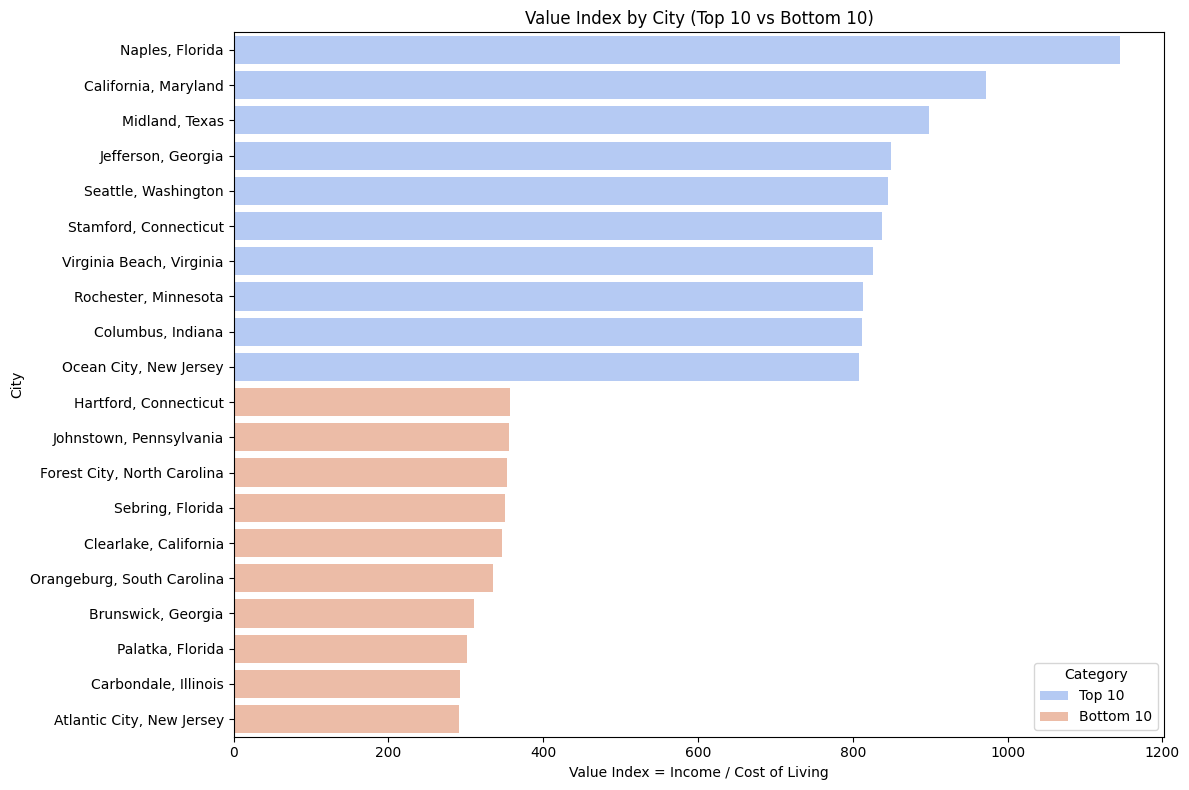

In [ ]:
# Calculate Value Index
merged_df['Value_Index'] = merged_df['Median_Household_Income'] / merged_df['Cost of Living Index']
print("Merged rows:", merged_df.shape[0])

# Select Top and Bottom 10 based on Value Index
top_value = merged_df.sort_values('Value_Index', ascending=False).head(10).copy()
bottom_value = merged_df.sort_values('Value_Index').head(10).copy()

# Sort bottom 10 in descending order so it displays smoothly on the plot
bottom_value = bottom_value.sort_values('Value_Index', ascending=False).copy()

# Clean up display names
top_value['Display_Name'] = top_value['Geography'].str.replace(r' (city|town|CDP),', ',', regex=True)
bottom_value['Display_Name'] = bottom_value['Geography'].str.replace(r' (city|town|CDP),', ',', regex=True)

# Print value data
print("Top 10 Most Valuable Places:")
print(top_value[['Display_Name', 'Value_Index', 'Median_Household_Income', 'Cost of Living Index']])

print("\nBottom 10 Least Valuable Places:")
print(bottom_value[['Display_Name', 'Value_Index', 'Median_Household_Income', 'Cost of Living Index']])

# Prepare for plotting
top_value['Category'] = 'Top 10'
bottom_value['Category'] = 'Bottom 10'

plot_df = pd.concat([top_value, bottom_value])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=plot_df,
    y='Display_Name',
    x='Value_Index',
    hue='Category',
    dodge=False,
    palette='coolwarm'
)
plt.title('Value Index by City (Top 10 vs Bottom 10)')
plt.xlabel('Value Index = Income / Cost of Living')
plt.ylabel('City')
plt.tight_layout()
plt.show()


#Interpreting Value Index by City Bar Graph:
_____________________
##Understanding the Value Index
I calculated the Value Index as:
- value index = (median household index) / (cost of living index)

Median household index is pulled from the 2021 US Census data, and cost of living index is a calculated value present in the Cost of Living dataset. This calculated value is derived from average U.S. household budgets and uses weighted spending across six key expense categories: Housing (23.2%), Food (16.1%), Transportation (18.6%), Utilities (10.1%), Healthcare (9.6%), and Discretionary Spending (22.3%). These weights were combined to calculate a cost of living score for each city.

The **higher the Value Index, the more income residents have available relative to expenses**. Likewise, the opposite is true, with a lower Value Index score meaning less available income relative to expenses.  Scores range from 291.89 to 1145.39.
_____________________
##Top 10 Cities with the Highest Value Index Scores:
These cities have **much higher median incomes relative to their cost of living**, meaning resudents typically get more purchasing power for each dollar they earn. Based on the datasets and my calculations, this would be cities like Naples, FL, California, MD, Midland, TX, and Stamford, CT. In other words, they offer **the best value for money** when it comes to affording life comfortably.
###Interpretation:
- These cities often have **strong economies** with dominant industries like tech, energy, healthcare, or government.
- **Higher income floors**- even entry-level or lower-income earners tend to make more than average.
- The **cost of living is moderate**, but incomes are high enough to comfortably cover it.
- Residents likely enjoy **better quality of life**, with more disposable income for housing, healthcare, and savings.

_____________________
##Bottom 10 Cities with the Lowest Value Index Scores:
These cities have **much lower incomes compared to their cost of living**, which means residents may struggle to make ends meet. These areas offer **less economic value** to the average household. Based on the datasets and my calculations, this would be cities like Johnstown, PA, Forest City, NC, Palatka, FL, and Atlantic City, NJ.
###Interpretation:
- These places may be facing **economic decline or stagnation**, often in post-industrial or rural regions.
- **Fewer high-paying job opportunities** lead to lower median incomes overall.
- Even though some of these cities have a relatively low cost of living, **incomes are so low** that basic needs can still be hard to afford.
- Residents might experience **higher financial stress** or find it harder to escape **poverty**.

_____________________
##TLDR:
The Value Index compares a city’s median household income to its cost of living, revealing how far a dollar stretches in each place. Cities with high Value Index scores offer strong income relative to expenses—meaning more purchasing power and better quality of life. In contrast, low-scoring cities often have limited economic opportunities and low wages that don’t keep up with the cost of basic needs.

#What This Graph Means for My Project:
_____________________
The Value Index bar chart helps answer the project's question from an **economic efficiency** perspective- it's not just about how much people earn or how much life costs, but how well those two forces balance out. This chart is valuable beceause:
- It reveals where residents get the **most purchasing power** for their income- highlighting cities where people can afford life more comfortably.
- Unlike the inequality chart, which focuses on **how income is distributed**, this graph focuses on **how far income stretches** in real life.
- It shifts the project lens from identifying wealth gaps to identifying **high-opportunity cities** where wages align well with everyday costs- a more actionable insight for families, policymakers, and planners.

##3) Income vs. Cost of Living by City (with Trend Line)

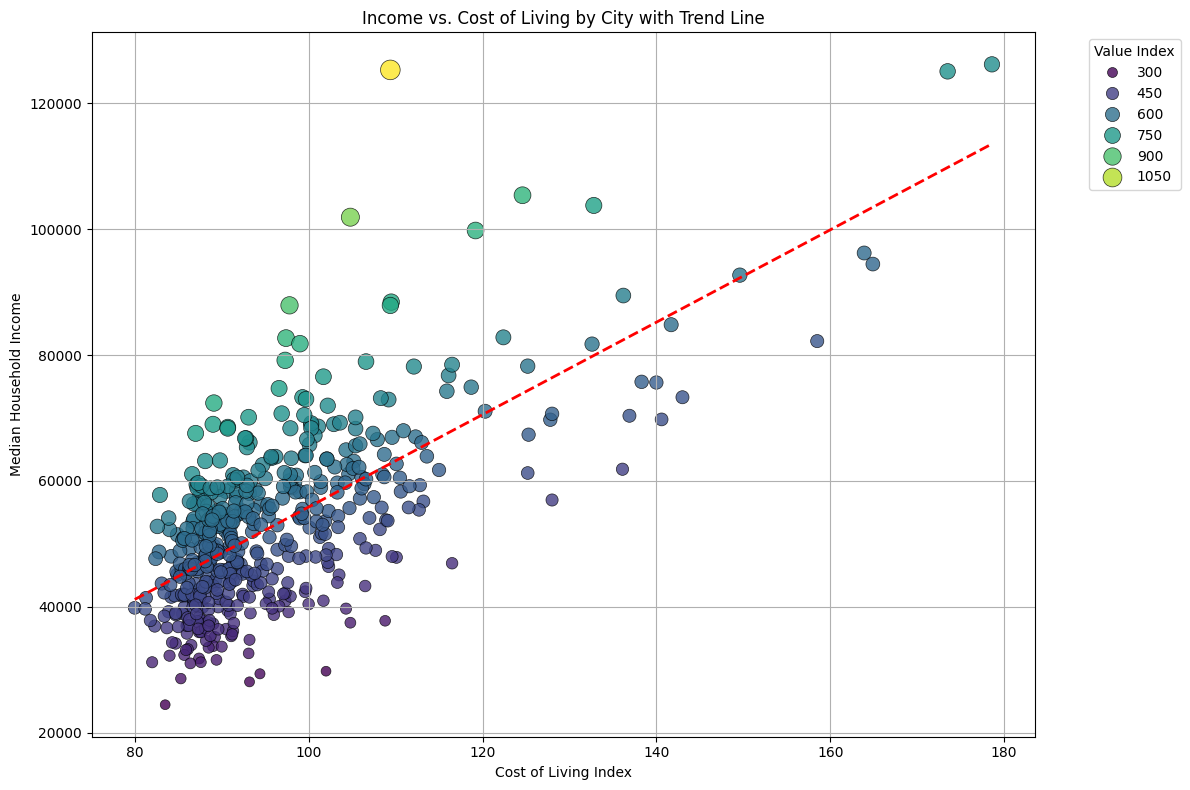

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create scatterplot with color and size based on Value Index
scatter = sns.scatterplot(
    data=merged_df,
    x='Cost of Living Index',
    y='Median_Household_Income',
    hue='Value_Index',
    palette='viridis',
    size='Value_Index',
    sizes=(50, 200),
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# Add a trend line with sns.regplot on top of the scatterplot
sns.regplot(
    data=merged_df,
    x='Cost of Living Index',
    y='Median_Household_Income',
    scatter=False,  # Disable the scatter part since we've already done it
    color='red',  # Color of the trend line
    line_kws={'lw': 2, 'ls': '--'},  # Customize the trend line appearance
    ci=None  # Remove confidence intervals
)

# Labels and title
plt.title('Income vs. Cost of Living by City with Trend Line')
plt.xlabel('Cost of Living Index')
plt.ylabel('Median Household Income')
plt.legend(title='Value Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()

plt.show()


#Interpreting Income vs. Cost of Living Scatterplot
_____________________

##1) Trend Line
###Interpretation:
A trend line that starts in the bottom-left corner and extends to the top right corner at a (roughly) 45 degree angle generally indicates a **positive correlation** between the two variables. This means that as the **Cost of Living** increases, the **Median Household Income** tends to increase as well.
  - For example, cities with higher living costs (e.g., coastal cities/cities in major urban areas) often have higher median household incomes, likely due to the demand for more skilled workers and the higher cost of living in those areas.

###45 Degree Slope:
The trend line's 45 degree slope suggests that for each increase in the **Cost of Living Index**, there's a proportional increase in the **Median Household Income**. This could point to the fact that higher-income areas tend to be in places with a higher cost of living. In essence, wealthier cities have higher costs of living, but the incomes in those places can also afford the higher costs.
_____________________

##2) Dots Below and Above the Trend Line (Size Differences)
###Interpretation of Dots **ABOVE** the Trend Line:
The dots above the trend line are cities with higher values indices, meaning their **Median Household Income** is higher relative to their **Cost of Living Index**. In other words, these are cities where the cost of living is not as high as expected for the income level.
- These could be cities where people earn relatively well, but the cost of living is not extremely high. This can be seen in areas like suburban or mid-size cities, where incomes are decent but the cost of living is relatively low.
- These cities are offering "more bang for the buck", making them ideal for people looking for a good balance between income and affordability.

###Interpretation of Dots **BELOW** the Trend Line:
The dots below the trend line are cities with **lower value indices**, meaning their **Median Household Income** is lower relative to their **Cost of Living Index**. These cities have **high costs of living** and relatively lower incomes.
- This situation can often be found in places where the cost of living is inflated due to factors such as housing bubbles, tourism, or high demand for limited space (e.g., coastal cities/major urban centers), but the median household income hasn't kept pace with rising costs.
- These cities may not be offering the best "value for money" for residents, especially in terms of income vs. living costs.

_____________________

##TLDR:
This scatterplot shows that as the **cost of living increases**, **income tends to rise too**- but not evenly everywhere. Cities **above** the trend line give you **more value for your income** (higher income for the cost), while cities **below** the line are **less efficient**, where high costs aren't matched by equally high incomes.

This scatterplot is a visual spotlight on which cities truly stretch your dollar, and which ones fall short.

#What This Graph Means for My Project:
_____________________
This scatterplot visualizes how **median household income** relates to the **cost of living** in cities across the U.S., with the size and color of each point representing the city's **Value Index** (income divided by cost of living).

Rather than isolating income or cost of living, this chart **fuses both economic forces into one view**- giving us a powerful lens to understand the real-world value of a dollar depending on geography. It's not just about who earns more or pays more- it's about **how far income stretches**, and where that equation is in or out of balance.

By plotting every city against the trend line of expected income relative to cost of living, we surface places that defy expectations- either offering **surprising affordability** or **hidden financial strain**. These outliers become key characters in the narrative, challenging assumptions like:
- "High income means better living", or
- "Low cost of living always equals savings."

#Final Thoughts on Python, Insights, and Impact
_____________________

Once the data was cleaned, merged, and processed, I used Python’s data visualization libraries—**Pandas, Seaborn, and Matplotlib**—to transform raw metrics into clear, digestible charts. These visuals made it easy to highlight key takeaways about income inequality, cost of living, and overall economic value across U.S. cities.


###Why These Visuals Matter:
Each graph served a specific analytical purpose:
- The **Income Inequality Bar Graph** revealed structural disparities between low and high-income residents in different areas.
- The **Value Index Bar Graph** showed where people get the most (or least) financial value out of their income.
- The **Cost vs Income Scatterplot** helped uncover which cities outperform or underperform economically when comparing income and cost of living together.

These visualizations didn’t just display data— they told stories about opportunity, affordability, and quality of life in a way that raw tables couldn't.


_____________________


###Why Python Was the Right Tool:
Using **Python in Google Colab** for this phase of the project was pefect because it allowed for:
- **Rapid data exploration** with pandas (filtering, aggregating, cleaning)
- **Quick plotting and customization** with matplotlib and seaborn
- Seamless integration with previous data prep work

Compared to something like D3.js, which excels at creating interactive visualizations for presentations or dashboards, Python is **faster and more powerful for exploratory analysis**— perfect for uncovering trends, validating hypotheses, and quickly adjusting methods on the fly.


_____________________
##In Summary:

The post-visualization phase was about turning clean data into compelling insights. Python made it easy to move from spreadsheets to storytelling—grounding the project in both technical rigor and real-world meaning. These visuals ultimately gave form to abstract concepts like economic efficiency and inequality, helping translate the data into actionable knowledge.

In [53]:
#Download combined csv file

merged_df.to_csv('/content/combined_dataset.csv', index=False)
from google.colab import files
files.download('/content/combined_dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>